# Movies Recommendation Engine

There are three main types of techniques for Recommendation systems:-



1.  Content-based filtering

1.  Collaborative filtering

1.  Knowledge-based system 




# **Content based filtering**
Content-based filtering is based on a single user’s interactions and preference. Recommendations are based on the metadata collected from a user’s history and interactions.This algorithm recommends products which are similar to the ones that a user has liked in the past.

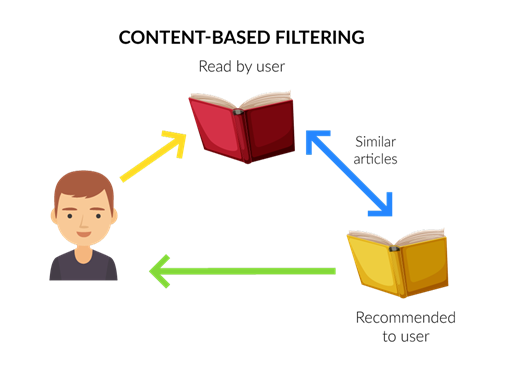

The content-based filtering algorithm finds the cosine of the angle between the profile vector and item vector, i.e. cosine similarity. Suppose A is the profile vector and B is the item vector, then the similarity between them can be calculated as:



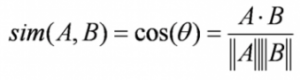

Based on the cosine value, which ranges between -1 to 1, the movies are arranged in descending order and one of the two below approaches is used for recommendations:


*   **Top-n approach:** where the top n movies are recommended (Here n can be decided by the business)
*   **Rating scale approach:** Where a threshold is set and all the movies above that threshold are recommended

Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. In this context, the two vectors I am talking about are arrays containing the word counts of two documents.



Okay now let's do the practical works with importing the data.

In [1]:
#Libraries
import pandas as pd
import numpy as np

In [2]:
credits = pd.read_csv('data/tmdb_5000_credits.csv')
movies = pd.read_csv('data/tmdb_5000_movies.csv')

In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Here in our dataset **credits** data contains 4 columns:-


*   movie_id

*   title	
*   cast


*   crew



**Movies** Dataset:-


*   budget - The budget in which the movie was made.

*  genre - The genre of the movie, Action, Comedy ,Thriller etc

*  homepage - A link to the homepage of the movie.

*   id - This is infact the movie_id as in the first dataset.

*   keywords - The keywords or tags related to the movie.


*   original_language - The language in which the movie was made.


*   original_title - The title of the movie before translation or adaptation.


*   overview - A brief description of the movie.


*   popularity - A numeric quantity specifying the movie popularity.


*  production_companies - The production house of the movie.


*   production_countries - The country in which it was produced.
*   release_date - The date on which it was released.


*   revenue - The worldwide revenue generated by the movie.
*   runtime - The running time of the movie in minutes.


*  status - "Released" or "Rumored".
*  tagline - Movie's tagline.


*   title - Title of the movie.
*   vote_average - average ratings the movie recieved.


*  vote_count - the count of votes recieved.
















In [5]:
#Shape of the dataset
print('Credits Shape:-',credits.shape)
print('Movies Data Shape :-',movies.shape)

Credits Shape:- (4803, 4)
Movies Data Shape :- (4803, 20)


Let's do some exploration on the dataset with few cleaning as well.

In [6]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [7]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [8]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


In [9]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

*homepage*, *tagline*, *runtime*,*release_date* contains Null values.

In [10]:
credits.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [11]:
vote_avg = movies['vote_average'].mean()
print("Vote Average:-",vote_avg)

Vote Average:- 6.092171559442011


In [12]:
movies['overview'].sample(10)

2164    Haley is a naturally gifted athlete but, with ...
3829    EC Comics-inspired weirdness returns with thre...
2183    After losing her job, making out with her soon...
1417    After Washington DC detective Alex Cross is to...
3152    Shakespeare's Play transplanted into a 1930s s...
975     An interpol agent and an attorney are determin...
4671    This is a story about Mike, a guy who left his...
1178    The attempted assassination of the American Pr...
3254    Eleven year-old Akeelah Anderson's life is not...
2030    When two married business executives having an...
Name: overview, dtype: object

In [13]:
movies['keywords'].sample(10)

2045    [{"id": 572, "name": "sex"}, {"id": 703, "name...
399     [{"id": 414, "name": "hunter"}, {"id": 1262, "...
34      [{"id": 1299, "name": "monster"}, {"id": 5984,...
4307                                                   []
4227    [{"id": 536, "name": "israel"}, {"id": 6092, "...
1382    [{"id": 242, "name": "new york"}, {"id": 380, ...
4148    [{"id": 5483, "name": "coffee shop"}, {"id": 8...
1109    [{"id": 680, "name": "montana"}, {"id": 797, "...
1098    [{"id": 572, "name": "sex"}, {"id": 1459, "nam...
690     [{"id": 531, "name": "southern usa"}, {"id": 5...
Name: keywords, dtype: object

In [14]:
movies['production_companies'].head()

0    [{"name": "Ingenious Film Partners", "id": 289...
1    [{"name": "Walt Disney Pictures", "id": 2}, {"...
2    [{"name": "Columbia Pictures", "id": 5}, {"nam...
3    [{"name": "Legendary Pictures", "id": 923}, {"...
4          [{"name": "Walt Disney Pictures", "id": 2}]
Name: production_companies, dtype: object

Now here I'll convert all the columns which are in JSON format to string.

---



In [15]:
#Merged DataFrame
#movies.head(10)
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [16]:
movies = movies.merge(credits,on='title')

Finally lets convert all the JSON format data.

In [17]:
#Importing the json librarie 
import json
import ast
ast.literal_eval

<function ast.literal_eval(node_or_string)>

# **Converting  Into String Format**

In [18]:
# changing the genres column from json to string
movies['genres'] = movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) 
    movies.loc[index,'genres'] = str(list1)

In [19]:
# changing the keywords column from json to string
movies['keywords'] = movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords'] = str(list1)

In [20]:
# changing the production_companies column from json to string
movies['production_companies'] = movies['production_companies'].apply(json.loads)
for index,i in zip(movies.index,movies['production_companies']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_companies'] = str(list1)

In [21]:
# changing the cast column from json to string
movies['cast'] = movies['cast'].apply(json.loads)
for index,i in zip(movies.index,movies['cast']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'cast'] = str(list1)

In [22]:
# changing the production_countries column from json to string
movies['production_countries'] = movies['production_countries'].apply(json.loads)
for index,i in zip(movies.index,movies['production_countries']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_countries'] = str(list1)

In [23]:
# changing the spoken_languages column from json to string
movies['spoken_languages'] = movies['spoken_languages'].apply(json.loads)
for index,i in zip(movies.index,movies['spoken_languages']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'spoken_languages'] = str(list1)

In [24]:
# changing the crew column from json to string

movies['crew'] = movies['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
movies['crew'] = movies['crew'].apply(director)
movies.rename(columns={'crew':'director'},inplace=True)

In [25]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,director
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...",...,162.0,"['English', 'Español']",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",...,169.0,['English'],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']",...,148.0,"['Français', 'English', 'Español', 'Italiano',...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",Sam Mendes
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",...,165.0,['English'],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",Christopher Nolan
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],...,132.0,['English'],Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",Andrew Stanton


In [26]:
movies = movies[['id','original_title','genres','cast','director','vote_average','keywords']]

In [27]:
movies.iloc[45]

id                                                            72190
original_title                                          World War Z
genres            ['Action', 'Drama', 'Horror', 'Science Fiction...
cast              ['Brad Pitt', 'Mireille Enos', 'Abigail Hargro...
director                                               Marc Forster
vote_average                                                    6.7
keywords          ['dystopia', 'apocalypse', 'zombie', 'nuclear ...
Name: 45, dtype: object

Here you can notice there are so many irrelevent features which doesn't give any sense.

In [28]:
'''def get_5(text):
  list1 = []
  counter = 0
  for i in ast.literal_eval(text):
    if counter < 5:
      list1.append(i['name'])
      counter = counter + 1
      return list1

movies['cast'] = movies['cast'].apply(get_5)'''

"def get_5(text):\n  list1 = []\n  counter = 0\n  for i in ast.literal_eval(text):\n    if counter < 5:\n      list1.append(i['name'])\n      counter = counter + 1\n      return list1\n\nmovies['cast'] = movies['cast'].apply(get_5)"

In [29]:
'''def get_companies(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 2:
            L.append(i['name'])
            counter = counter + 1
    return L
movies['production_companies'] = movies['production_companies'].apply(get_companies)

def get_contries(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 1:
            L.append(i['name'])
            counter = counter + 1
    return L
movies['production_countries'] = movies['production_countries'].apply(get_contries)

ef get_language(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 2:
            L.append(i['name'])
            counter = counter + 1
    return L
movies['spoken_languages'] = movies['spoken_languages'].apply(get_language)'''

"def get_companies(text):\n    L = []\n    counter = 0\n    for i in ast.literal_eval(text):\n        if counter < 2:\n            L.append(i['name'])\n            counter = counter + 1\n    return L\nmovies['production_companies'] = movies['production_companies'].apply(get_companies)\n\ndef get_contries(text):\n    L = []\n    counter = 0\n    for i in ast.literal_eval(text):\n        if counter < 1:\n            L.append(i['name'])\n            counter = counter + 1\n    return L\nmovies['production_countries'] = movies['production_countries'].apply(get_contries)\n\nef get_language(text):\n    L = []\n    counter = 0\n    for i in ast.literal_eval(text):\n        if counter < 2:\n            L.append(i['name'])\n            counter = counter + 1\n    return L\nmovies['spoken_languages'] = movies['spoken_languages'].apply(get_language)"

Here you can notice there are so many irrelevent features which doesn't give any sense.

In [30]:
movies.shape

(4809, 7)

In [31]:
movies.iloc[45]

id                                                            72190
original_title                                          World War Z
genres            ['Action', 'Drama', 'Horror', 'Science Fiction...
cast              ['Brad Pitt', 'Mireille Enos', 'Abigail Hargro...
director                                               Marc Forster
vote_average                                                    6.7
keywords          ['dystopia', 'apocalypse', 'zombie', 'nuclear ...
Name: 45, dtype: object

In [32]:
movies.dtypes

id                  int64
original_title     object
genres             object
cast               object
director           object
vote_average      float64
keywords           object
dtype: object

In [33]:
movies.isnull().sum()

id                 0
original_title     0
genres             0
cast               0
director          30
vote_average       0
keywords           0
dtype: int64

Droping Nan values

In [34]:
movies.dropna(inplace=True)

# Visual Exploration of Genres

In [35]:
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

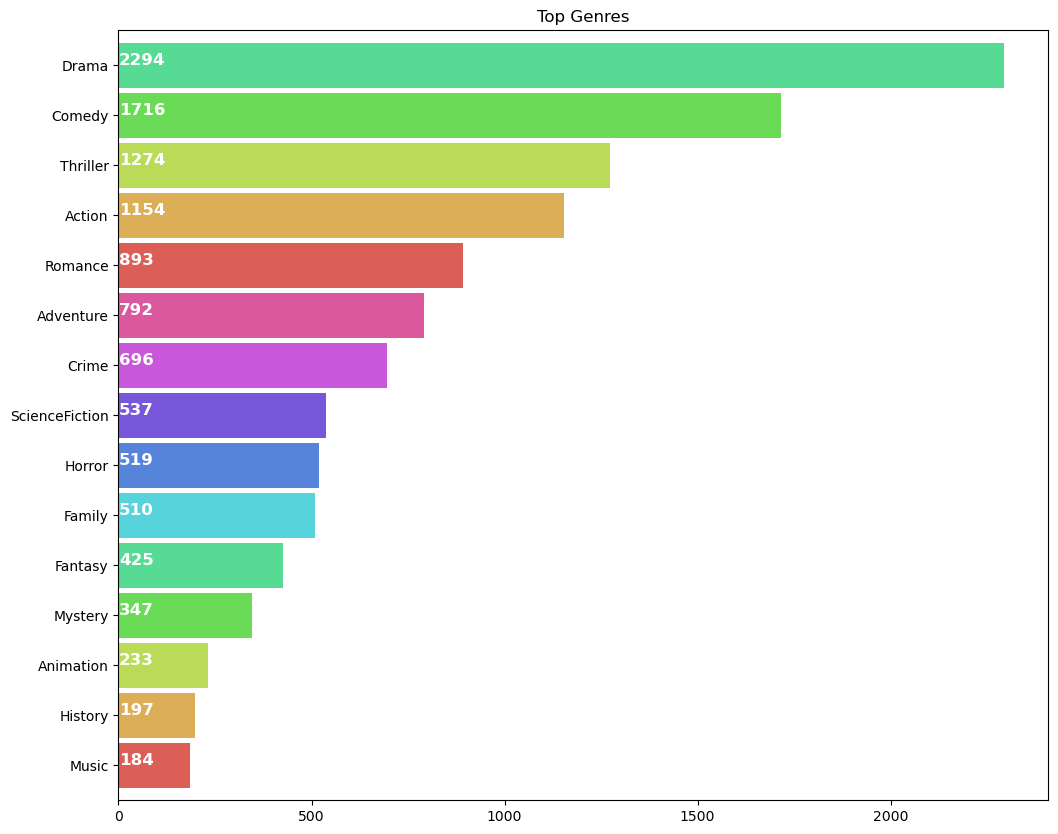

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(12,10))
list1 = []
for i in movies['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

After observation ***drama*** appears to be the most joners in system.

# Cast Column::

In [37]:
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['cast'] = movies['cast'].str.split(',')

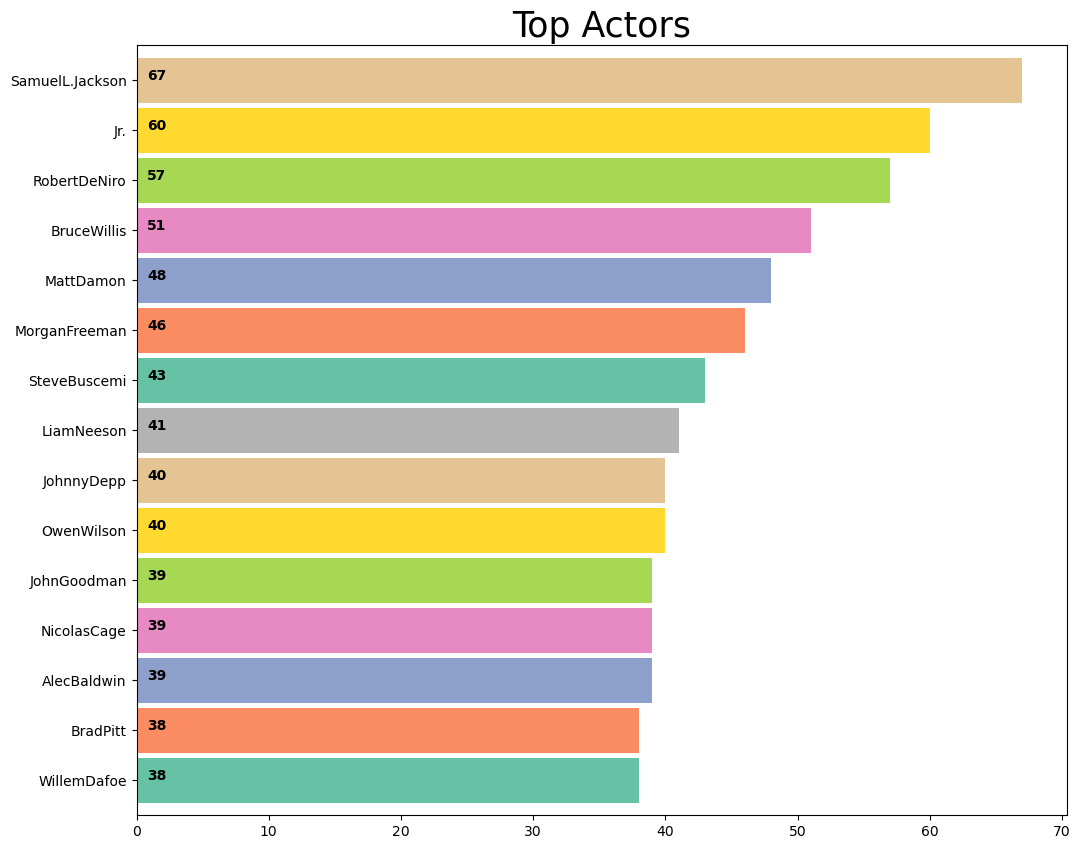

In [38]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('Set2'))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='black',weight='bold')
plt.title('Top Actors',fontsize='25')
plt.show()

In [39]:
def space(col):
  if col is None:
    return ' '
  return str(col)

In [40]:
movies['director'] = movies['director'].apply(space)

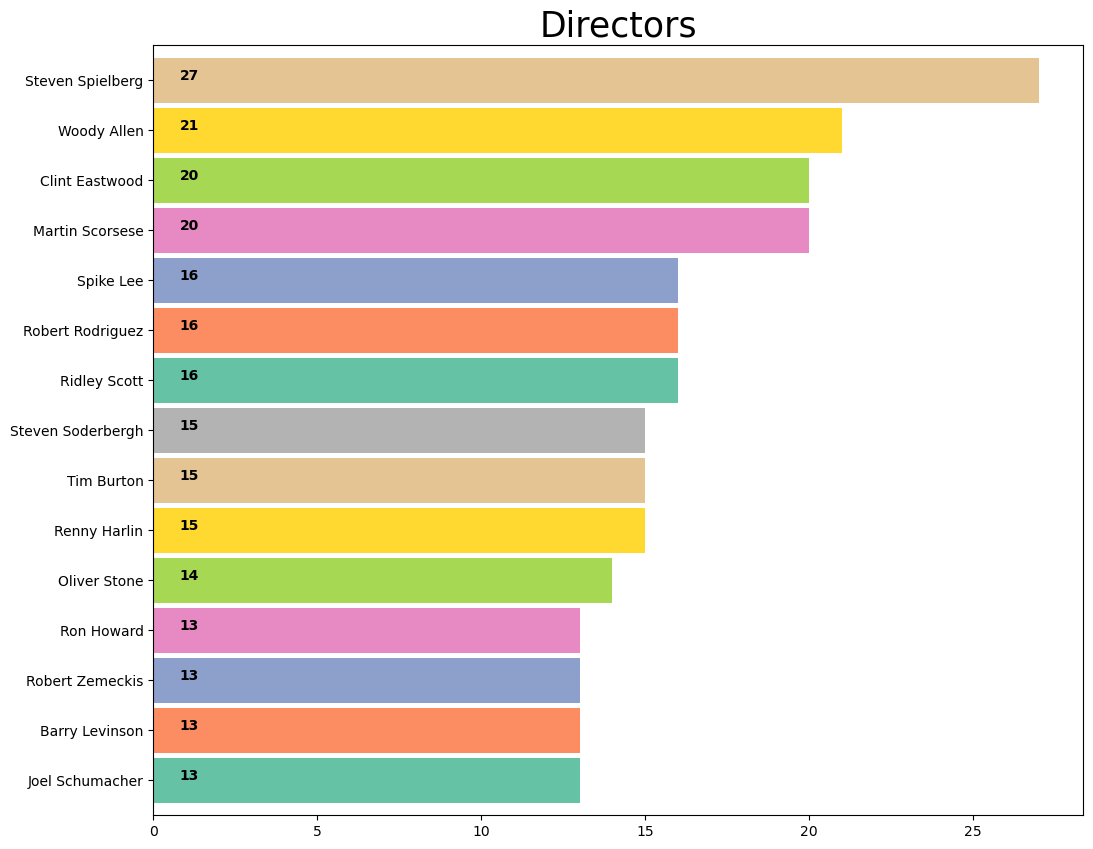

In [41]:
plt.subplots(figsize=(12,10))
ax=movies[movies['director']!=''].director.value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('Set2'))
for i, v in enumerate(movies[movies['director']!=''].director.value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='black',weight='bold')
plt.title('Directors',fontsize='25')
plt.show()

In [42]:
movies.head()

,id,original_title,genres,cast,director,vote_average,keywords
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",James Cameron,7.2,"['culture clash', 'future', 'space war', 'spac..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",Gore Verbinski,6.9,"['ocean', 'drug abuse', 'exotic island', 'east..."
2,206647,Spectre,"[Action, Adventure, Crime]","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",Sam Mendes,6.3,"['spy', 'based on novel', 'secret agent', 'seq..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[ChristianBale, MichaelCaine, GaryOldman, Anne...",Christopher Nolan,7.6,"['dc comics', 'crime fighter', 'terrorist', 's..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",Andrew Stanton,6.1,"['based on novel', 'mars', 'medallion', 'space..."


# Building the Recommendation Engine

We can create combine features function now , which will be a string that contains all metadata(Keywords,Cast,Director and Genres) about movie that we want to feed our vectorize

In [43]:
def features(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

movies['combine_feature'] = movies.apply(features,axis=1)

In [44]:
movies[['original_title','combine_feature']]

,original_title,combine_feature
0,Avatar,"[ ' c u l t u r e c l a s h ' , ' f u t u ..."
1,Pirates of the Caribbean: At World's End,"[ ' o c e a n ' , ' d r u g a b u s e ' , ..."
2,Spectre,"[ ' s p y ' , ' b a s e d o n n o v e l ..."
3,The Dark Knight Rises,"[ ' d c c o m i c s ' , ' c r i m e f i ..."
4,John Carter,"[ ' b a s e d o n n o v e l ' , ' m a r ..."
...,...,...
4804,El Mariachi,[ ' u n i t e d s t a t e s – m e x i c o ...
4805,Newlyweds,[ ] EdwardBurns KerryBishé MarshaDietlein Cait...
4806,"Signed, Sealed, Delivered","[ ' d a t e ' , ' l o v e a t f i r s t ..."
4807,Shanghai Calling,[ ] DanielHenney ElizaCoupe BillPaxton AlanRuc...


In [45]:
#Importing Sckit learn libraries for calculating Cosine Similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [46]:
cv = CountVectorizer(stop_words='english') #creating new CountVectorizer() object
count_matrix = cv.fit_transform(movies["combine_feature"]) #feeding combined strings(movie contents) to CountVectorizer() object
cosine_sin = cosine_similarity(count_matrix,count_matrix)

Now i will define the function to get recommendation for the movies that takes in a movie title as an input and outputs a list of the 10 most similar movies.

In [47]:
# Reset index of our main DataFrame and construct reverse mapping as before
movies = movies.reset_index()
indices = pd.Series(movies.index, index = movies['original_title'])

In [48]:
# Function that takes in movie title as input and outputs most similar movies
def recommendation_movie(title, cosine_sim=cosine_sin):

    # Get the index of the movie that matches the title
    idx = indices[title]
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 20 most similar movies
    sim_scores = sim_scores[1:21]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 20 most similar movies
    
    print('-----------Movies-Recommended-----------------')
    print('---'*15)
    return movies['original_title'].iloc[movie_indices]

  Let's generate the recommendation.

In [49]:
#Haunted Movie 
recommendation_movie('The Conjuring')

-----------Movies-Recommended-----------------
---------------------------------------------


1163                The Conjuring 2
4223                      Insidious
3559           Insidious: Chapter 2
4637                     The Frozen
4406    Snow White: A Deadly Summer
3005           Insidious: Chapter 3
2152                 The Stepfather
2224                 Death Sentence
4131                      Eden Lake
3338                 The Omega Code
3844                          Train
3857                           2:13
4232                      Unsullied
4427                     Hard Candy
4657                    Malevolence
4729                        Hayride
3899                      The Purge
2837                     Quarantine
3952                       Creature
4288                            Saw
Name: original_title, dtype: object

In [50]:
#Army Based,War
recommendation_movie('Fury')

-----------Movies-Recommended-----------------
---------------------------------------------


236                       Windtalkers
3292                   The Land Girls
246                       The Patriot
3229                      All Is Lost
2551                     End of Watch
4101                      Harsh Times
1445                  Lions for Lambs
4685                   Heroes of Dirt
3315                  Loin des hommes
680                             U-571
2504                             Good
4250                     Last I Heard
4652                   The Grace Card
3907     The Bridge on the River Kwai
1907    The Greatest Game Ever Played
2260                            黃石的孩子
2652                   Silent Trigger
3387                  The Mighty Macs
3662                         Redacted
3862                      Dawn Patrol
Name: original_title, dtype: object

In [51]:
#Romantic-Drama
recommendation_movie('The Vow')

-----------Movies-Recommended-----------------
---------------------------------------------


4198                               Yes
4516                  Twin Falls Idaho
2785                         The Claim
2795                The Emperor's Club
3439    A Home at the End of the World
1897                         Dear John
3121                     The Open Road
2373                  The Last Station
3915                      Krush Groove
4409                Steppin: The Movie
4529                    Kiss the Bride
1805                      Original Sin
4026                My Life Without Me
2327                  The Family Stone
3373                Outside Providence
3657                     Lovely, Still
3797              The Velocity of Gary
3925             Woman Thou Art Loosed
4407                      A escondidas
4750                    Pink Narcissus
Name: original_title, dtype: object

In [52]:
#Adventure/Action
recommendation_movie('The Mummy Returns')

-----------Movies-Recommended-----------------
---------------------------------------------


76                      G.I. Joe: The Rise of Cobra
71            The Mummy: Tomb of the Dragon Emperor
292                                          Eragon
3429                    The Adventures of Huck Finn
3905                           Pokémon 3: The Movie
3860                    In the Name of the King III
3229                                    All Is Lost
1096                                    Deep Rising
627                                 The Last Legion
715                               The Scorpion King
2661    Dungeons & Dragons: Wrath of the Dragon God
600                                    Killer Elite
495                Journey 2: The Mysterious Island
1938                                         Sheena
166                           G.I. Joe: Retaliation
786                                    西游记之孙悟空三打白骨精
1259                                         Ishtar
1444                                          Krull
1047             Journey to the Center of the Earth
1299        

Here I think model not performing appropriate on with *Adventure/Action* geners..

In [53]:
#Sci/Fiction
recommendation_movie('Avatar')

-----------Movies-Recommended-----------------
---------------------------------------------


1658                     Dragonball Evolution
1938                                   Sheena
587                                 The Abyss
1299                             Superman III
1945                               BloodRayne
3905                     Pokémon 3: The Movie
168         Final Fantasy: The Spirits Within
607     Sky Captain and the World of Tomorrow
1195                                    Spawn
232                             The Wolverine
2598                      Highlander: Endgame
3860              In the Name of the King III
3229                              All Is Lost
2409                                   Aliens
3000               Mad Max Beyond Thunderdome
3899                                The Purge
618                               Mystery Men
1096                              Deep Rising
1004    Street Fighter: The Legend of Chun-Li
1808             Highlander III: The Sorcerer
Name: original_title, dtype: object